<a href="https://colab.research.google.com/github/AdamAnderB/Bramlett_DSPN_S24/blob/main/book/exercises/classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 9: Classification

This homework assignment is designed to give you practice with classification models. We'll try to predict which words are more likely to be responded to correctly during a lexical decision task, based on their length and frequency.

We will be using data from the English Lexicon Project again. However, this time we will use response correctness as our dependent variable. Load **LexicalData_withIncorrect.csv**, which includes incorrect trials as well as correct ones, and also **Items.csv**. Both can be found in the *Homework/lexDat* folder in the class GitHub repository.

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides response correctness and reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not. The **Items.csv** provides characteristics of the words used, namely frequency (how common is this word?) and length (how many letters?).

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading and formatting the data (1 point)

Load in data from the **LexicalData_withIncorrect.csv** and **Items.csv** files. Use `left_join` to add word characteristics `Length` and `Log_Freq_Hal` from **Items** to the **LexicalData**, and use `drop_na()` to get rid of any observations with missing values. Then use `head()` to look at the first few rows of the data.

*Note: We're just working with `Correct` in this homework, so no need to worry about reformatting reaction times.*

In [6]:
# WRITE YOUR CODE HERE

url <- "https://raw.githubusercontent.com/CoAxLab/DataSciencePsychNeuro/master/Homework%20datasets/lexDat/Items.csv"
file <- "Items.csv"
download.file(url, file)
items<-read.csv("Items.csv")

url <- "https://raw.githubusercontent.com/CoAxLab/DataSciencePsychNeuro/master/Homework%20datasets/lexDat/LexicalData_withIncorrect.csv"
file <- "LexicalData_withIncorrect.csv"
download.file(url, file)
lexical<-read.csv("LexicalData_withIncorrect.csv")
library(tidyverse)

In [20]:
lexical_items <- left_join(lexical, items, by = c("D_Word" = "Word"))
lexical_items<-lexical_items%>%
  drop_na()
head(lexical_items)

,X,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Correct,Occurrences,Length,Freq_HAL,Log_Freq_HAL
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<dbl>
1,1,157,1,1,710,browse,false,-0.437,1,2,6,"7,016",8.856
2,2,67,1,1,"1,094",refrigerant,false,0.825,1,3,11,104,4.644
3,3,120,1,1,587,gaining,false,-0.645,1,4,7,"4,039",8.304
4,4,21,1,1,984,cheerless,false,0.025,1,4,9,14,2.639
5,5,236,1,1,577,pattered,false,-0.763,1,4,8,4,1.386
6,6,236,2,1,715,conjures,false,-0.364,1,4,8,194,5.268


---
## 2. Visualizing the data (1 point)

First, we'll try to visualize whether trials that are responded to correctly versus incorrectly differ from each other in terms of word length and log frequency. The code is included below, so that this homework doesn't get too cumbersome. All you have to do is **change the name of the data set**, **run the code**, and **write some observations about the output**.

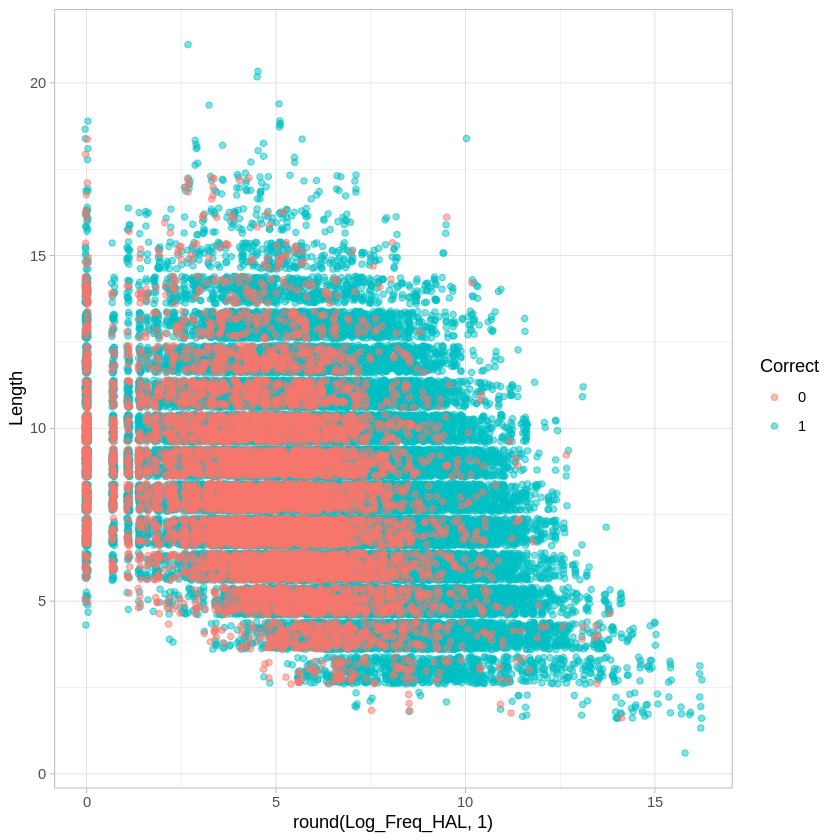

In [21]:
fdata<-lexical_items

require(tidyverse) # Load the tidyverse package, if you haven't yet
fdata$Correct <- as.factor(fdata$Correct) # so that R knows that Correct is categorical, not numeric.

# plot the Correct / Incorrect clusters
ggplot(fdata,aes(x=round(Log_Freq_HAL,1),y=Length,col=Correct)) + geom_point(position="jitter",alpha=0.5) + theme_light()


What do you observe about the "Correct" and "Incorrect" clusters?

*italicized text*> *Write your reponse here*
> They have significant overlap. However, incorrect ones have higher log frequency. As well as a larger spread overall. It also seems that the correct ones have a tighter grouping.

---
## 3. Logistic Regression: Fitting the model (2 points)

Fit a logistic regression model to the data using `Length`, `Log_Freq_HAL`, and their interaction to predict `Correct`. Use `glm()` to fit the model, and look at its output using `summary()`.

In [22]:
# WRITE YOUR CODE HERE

m1<-glm(Correct~Length*Log_Freq_HAL,family=binomial,data=fdata)
summary(m1)


Call:
glm(formula = Correct ~ Length * Log_Freq_HAL, family = binomial, 
    data = fdata)

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.939996   0.115623  -8.130 4.30e-16 ***
Length               0.151266   0.012789  11.828  < 2e-16 ***
Log_Freq_HAL         0.394772   0.018762  21.041  < 2e-16 ***
Length:Log_Freq_HAL -0.010558   0.002202  -4.795 1.63e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49809  on 70588  degrees of freedom
Residual deviance: 46563  on 70585  degrees of freedom
AIC: 46571

Number of Fisher Scoring iterations: 5


What can you conclude from this output? (a brief gist is fine)

> *Write your response here*
> Words that are longer are more likely to be correct. Words that have higher frequency are more likely to be correct. Above and beyond that, there is a interaction between length and log frequency. That is, when words are both more frequent and longer words it decreases the chances of being correct. The reduction in deviance from the null model to the model we used suggests that the predictors explain a significant amount of variability in the data.

---
## 4. Interpreting predictions from the model (3 points)

Finally, look at how well this logistic regression model does at predicting correctness. Use `predict()` and a threshold of 0.5 to generate predicted `Correct` values for each trial, then output a confusion matrix and overall accuracy for these predictions.

*Hint: see the Classifiers tutorial.*

In [26]:
# WRITE YOUR CODE HERE
predicted_probabilities<-predict(m1, new_data = fdata, type = "response")
predicted_classes<-ifelse(predicted_probabilities > 0.5, 1, 0)
confusion_matrix<-table(Predicted = predicted_classes, Actual = fdata$Correct)

print(confusion_matrix)

         Actual
Predicted     0     1
        0    13    44
        1  7966 62566


Did the model do well at predicting lexical decision correctness? Why or why not?

> *Write your response here*  
> Well it seems that it is doing a pretty decent job of knowing when something should be correct and it predicts it to be correct. However, this is ultimately not the deciding factors because it also has a lot of false positives and not very many true negatives. In this way, it is over predicting correctness in many cases and cannot identify when it should be wrong.

## 5. QDA (3 points)

Load in the `MASS` library and fit a QDA model to the data set. The predictors are still `Length`, `Log_Freq_HAL`, and their interaction, just like the logistic regression model you just ran, and the dependent variable is still `Correct`.

*Hint: see the Classifiers tutorial.*

In [29]:
# WRITE YOUR CODE HERE
library(MASS)
qda_m1<-qda(Correct~Length*Log_Freq_HAL,data=fdata)
qda_m1

Now look at how well the predicted `Correct` values compare with actual `Correct` values for the whole data set. Output a confusion matrix and overall prediction accuracy.

In [34]:
# WRITE YOUR CODE HERE

predicted_probabilities<-predict(qda_m1, new_data=fdata)
confusion_matrix <- table(Predicted=predicted_probabilities$class, Actual=fdata$Correct)
confusion_matrix


         Actual
Predicted     0     1
        0   455  1647
        1  7524 60963

How does QDA prediction performance differ from that of logistic regression?

> *Write your response here*
> true negative classification is much better. However it also has more false positives. So it depends on the context.If balancing correctly identyfying correct and incorrect is the goal then the QDA is the best. However, if it is only important to classify correct answers correctly and not worry about false negatives or false positives then the QDA seems that have a better overall performance.

**DUE:** 5pm EST, March 11, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*